In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 # computer vision
from PIL import Image # image processing
import tensorflow as tf
from tensorflow import keras
from tensorflow.math import confusion_matrix

In [3]:
from keras.datasets import mnist

In [4]:
tf.random.set_seed(3)

In [5]:
# loading the mnist data from keras.datasets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [6]:
type(X_train)

numpy.ndarray

In [7]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

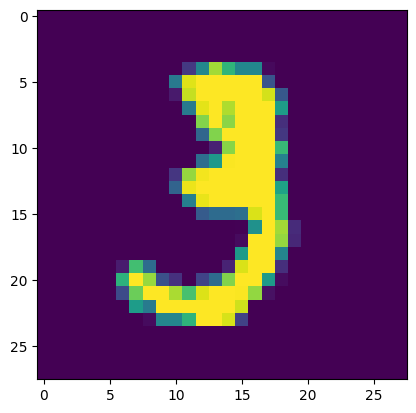

3


In [8]:
plt.imshow(X_train[10])
plt.show()
print(Y_train[10])

In [9]:
np.unique(Y_train), np.unique(Y_test)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

# scaling the values

In [10]:
X_train = X_train/255
X_test = X_test/255

# Building the Neural Networks

In [11]:
# reshaping the data into a 28x28x1 shape where 1 is the no. of channels
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [12]:
model = keras.models.Sequential([
    keras.Input(shape = (28,28,1)),
    keras.layers.Conv2D(32, 5, (3,3), padding = 'valid', activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax')
])

In [15]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [16]:
history = model.fit(X_train, Y_train, epochs = 12, validation_split = 0.1)

Epoch 1/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7521 - loss: 0.7635 - val_accuracy: 0.9720 - val_loss: 0.0909
Epoch 2/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9564 - loss: 0.1486 - val_accuracy: 0.9793 - val_loss: 0.0722
Epoch 3/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9696 - loss: 0.1017 - val_accuracy: 0.9822 - val_loss: 0.0597
Epoch 4/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9763 - loss: 0.0806 - val_accuracy: 0.9847 - val_loss: 0.0520
Epoch 5/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9776 - loss: 0.0717 - val_accuracy: 0.9862 - val_loss: 0.0486
Epoch 6/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9831 - loss: 0.0568 - val_accuracy: 0.9873 - val_loss: 0.0485
Epoch 7/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9846 - loss: 0.0518 - val_accuracy: 0.9855 - val_loss: 0.0514
Epoch 8/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9853 - loss: 0.0444 - 

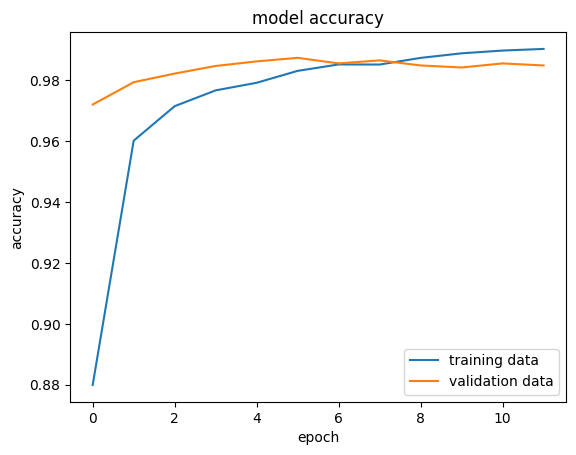

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc = 'lower right')
plt.show()

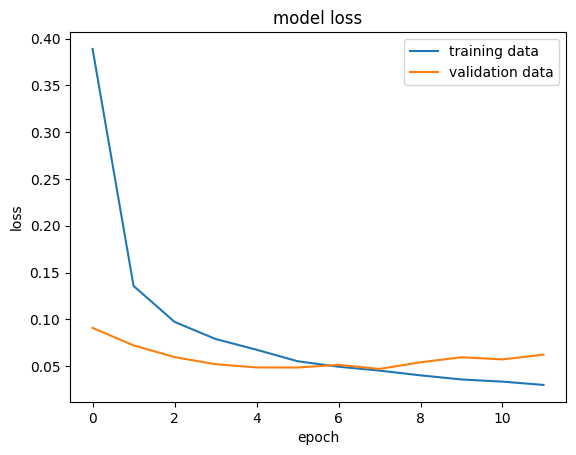

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc = 'upper right')
plt.show()

In [21]:
Y_pred = model.predict(X_test)
print(Y_pred.shape) # we get a list of ten value for each prediction
Y_pred_label = [np.argmax(i) for i in Y_pred]
# print("The answer is: ", Y_pred_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000, 10)


In [22]:
conf_mat = confusion_matrix(Y_test, Y_pred_label)

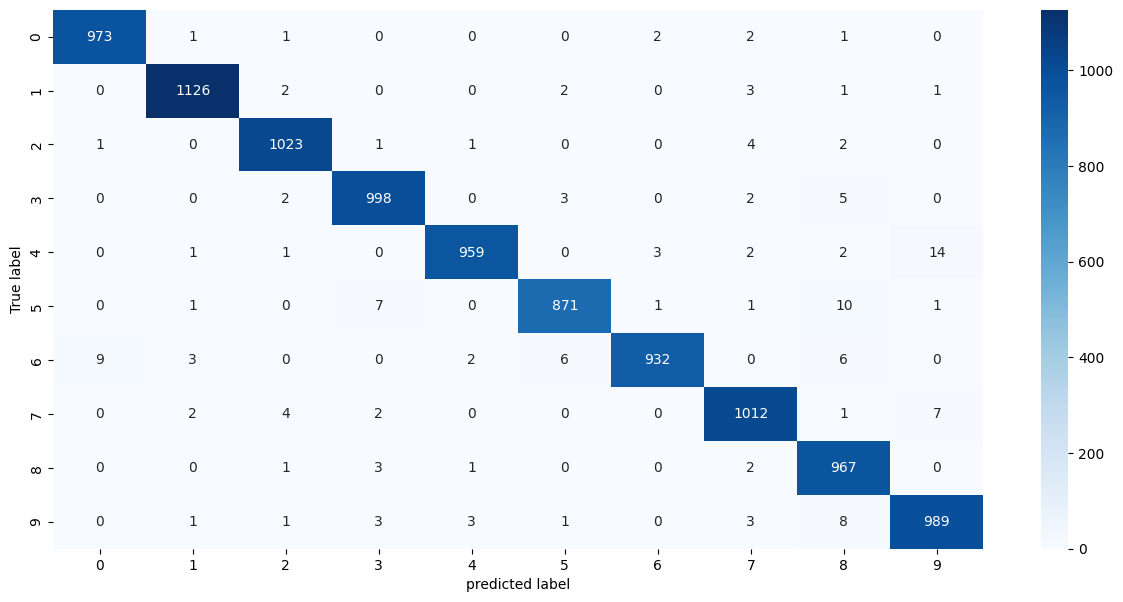

In [23]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel("True label")
plt.xlabel("predicted label")
plt.show()

In [25]:
train_loss, train_accuracy = model.evaluate(X_train, Y_train)
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("test_accuracy:", test_accuracy)
print("test_loss:", test_loss)
print("train_accuracy:", train_accuracy)
print("train_loss:", train_loss)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9946 - loss: 0.0155
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9800 - loss: 0.0784
test_accuracy: 0.9850000143051147
test_loss: 0.058628637343645096
train_accuracy: 0.9930166602134705
train_loss: 0.021562248468399048


Shape before reshaping: (28, 28, 1)
Ground truth:  3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
prediction:  3


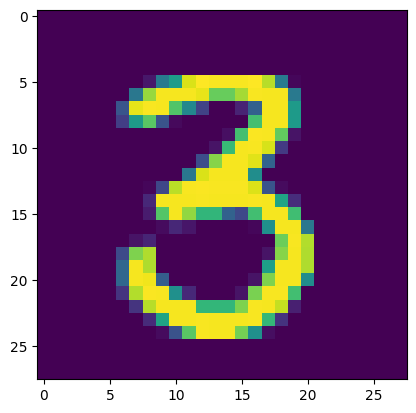

In [43]:
g = 752
plt.imshow(X_train[g])
input_picture = X_train[g]
print("Shape before reshaping:",input_picture.shape)
print("Ground truth: ",Y_train[g])

reshaped_input_pic = input_picture.reshape(1,28, 28,1)
Y_prediction = model.predict(reshaped_input_pic)
label = np.argmax(Y_prediction)
print("prediction: ",label)